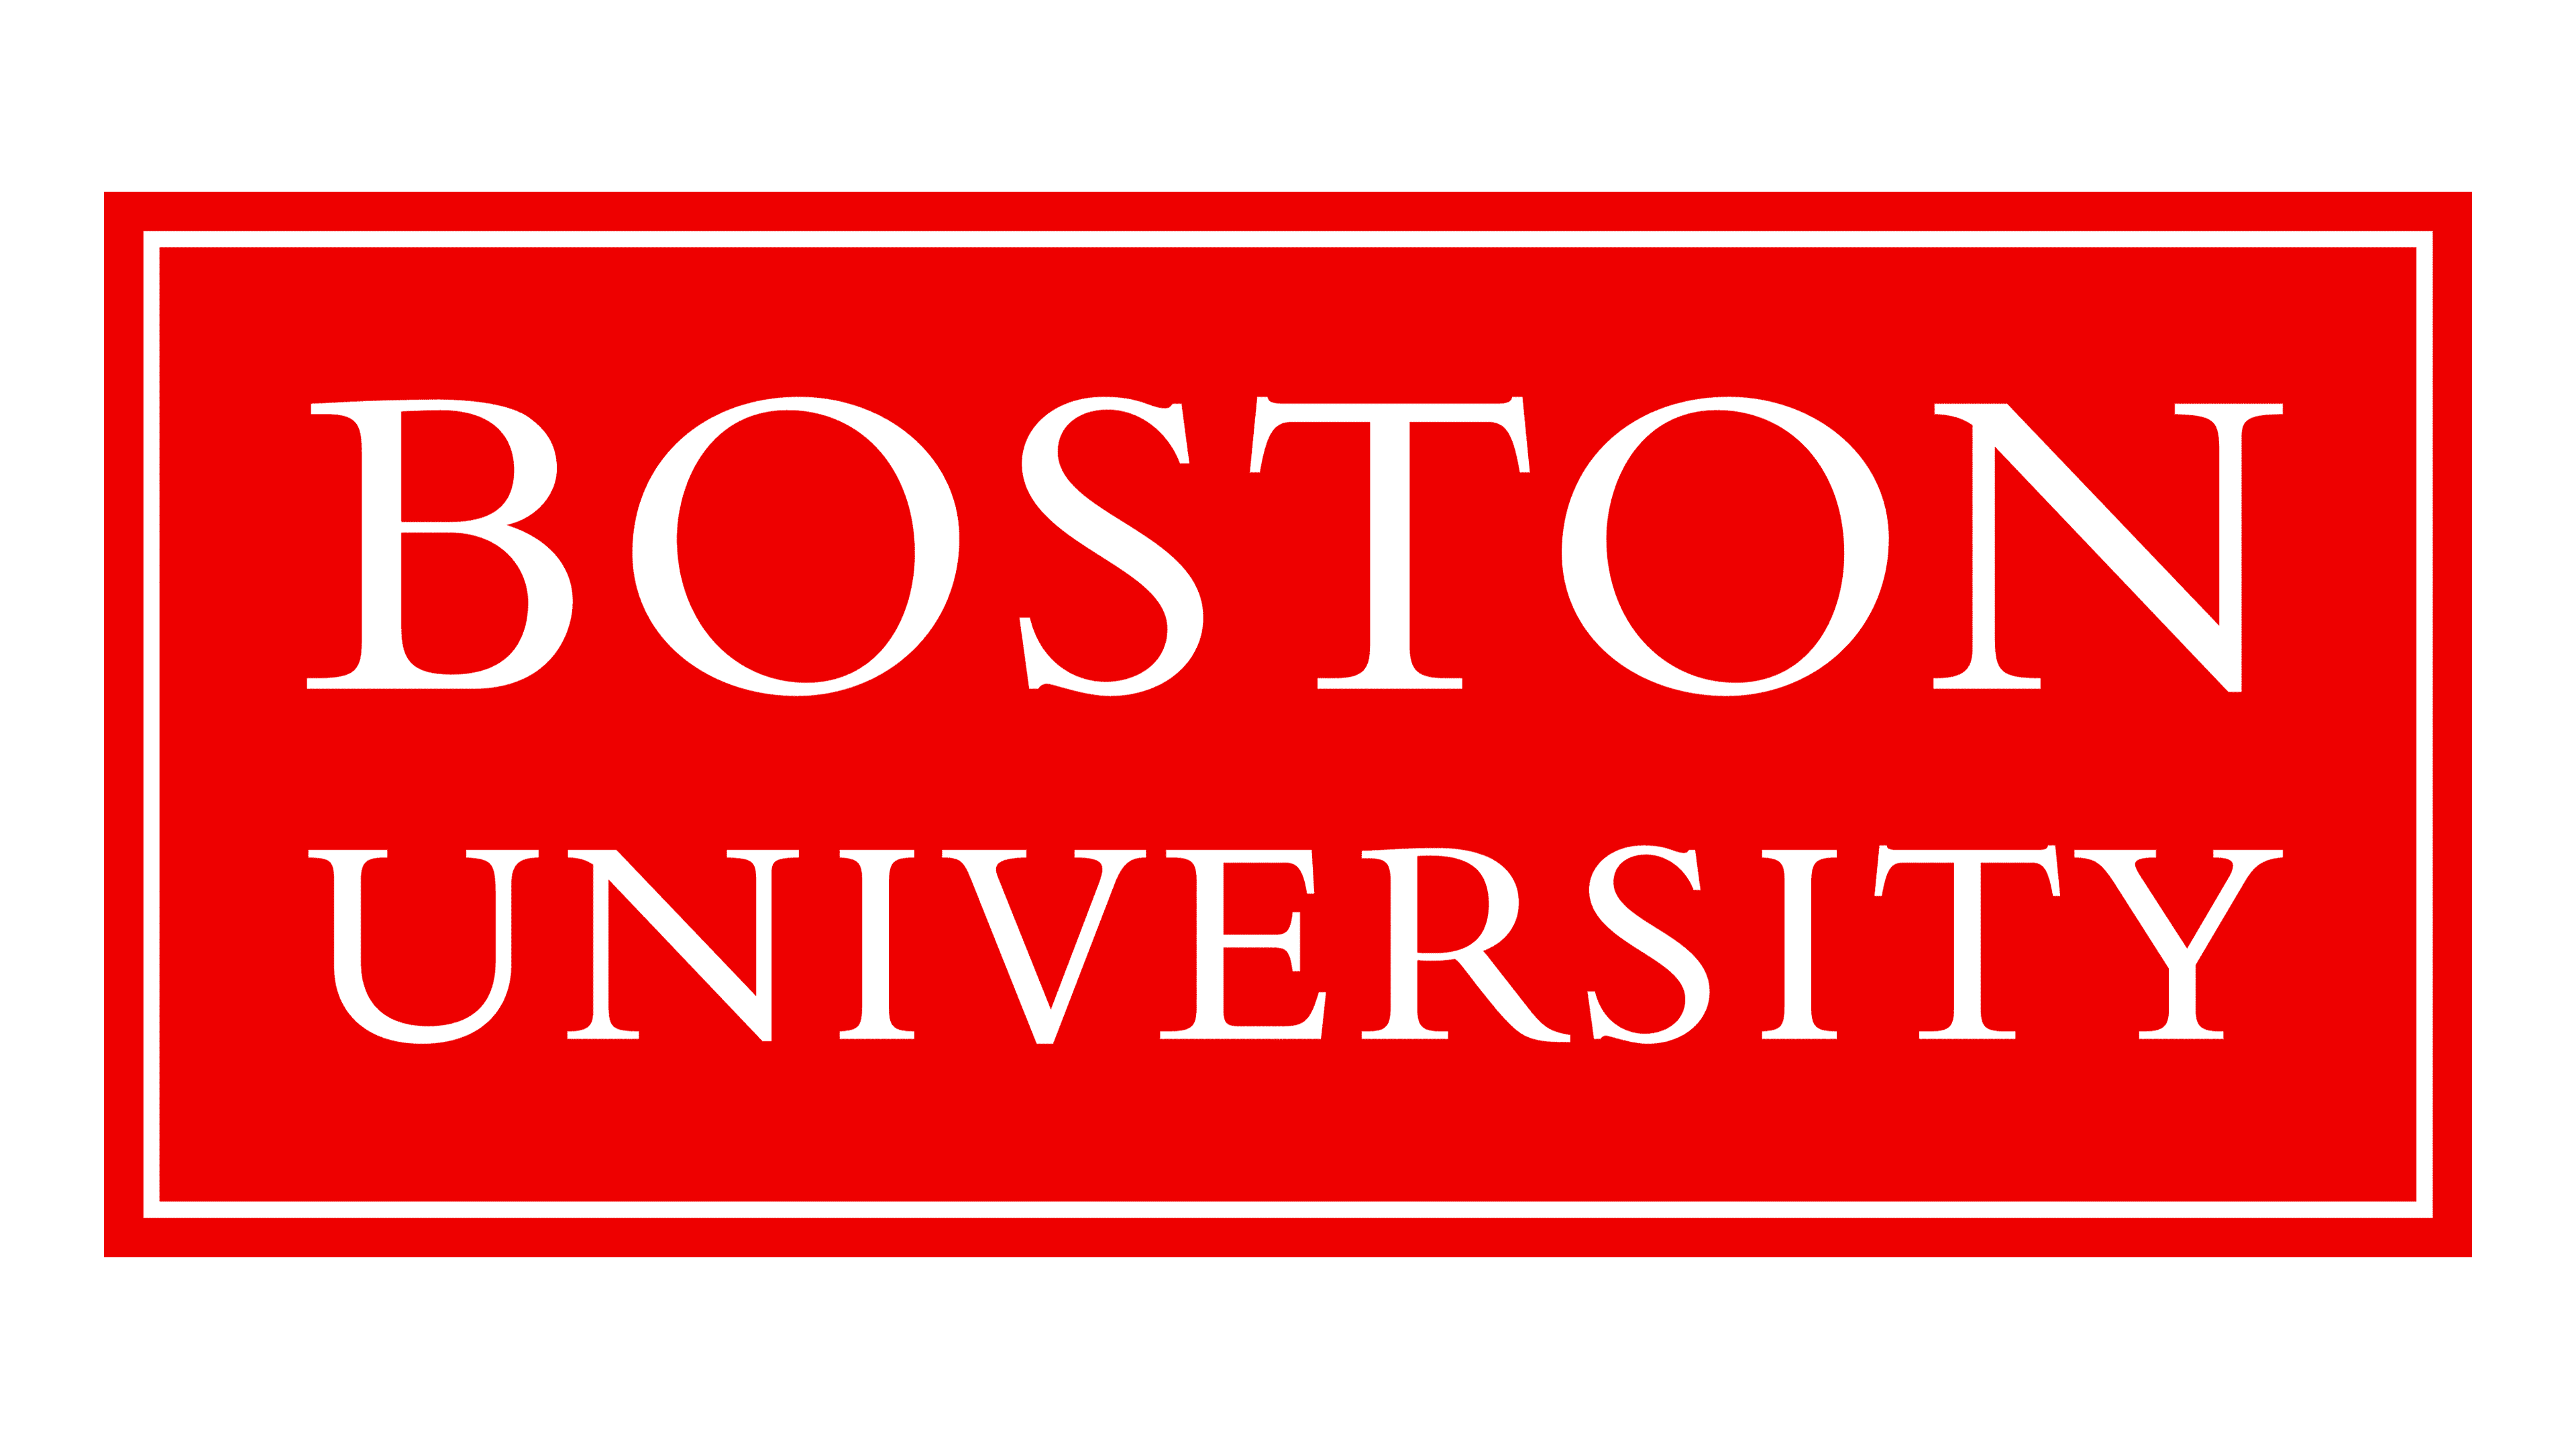


# <div style="text-align: center"> <h2>Assignment - 4</div>

# <div style="text-align: center"> <h4>AD654 A3 Marketing Analytics (Spring 2024)</div>

# <div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>

### Part I: Logistic Regression Model

In [1]:
import pandas as pd

##### Solution - A

In [2]:
df = pd.read_csv("IBM.csv")

In [3]:
# Looking at the dataframe
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


##### Solution - B

> **💡Result💡-**
>
> By looking at the dataframe, we can categorise the variables as follows:
>
>**CATEGORICAL VARIABLES**
>
> Attrition, Department, EducationField, MaritalStatus, Education, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance
>
> **ORDINAL VARIABLES**
>
> Education, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance
>
> **NUMERICAL VARIABLES**
>
> Age, DistanceFromHome, MonthlyIncome,	NumCompaniesWorked, YearsAtCompany.

##### Solution - C

In [4]:
# Outcome Variable  - "Attrition"
df_attrition = df["Attrition"].value_counts()
df_attrition

Attrition
No     1233
Yes     237
Name: count, dtype: int64

> **💡Interpretation of Result💡-**
>
> a] The "Attrition" variable has two outocme classes: "No" and "Yes"
> In the dataset the "No" class of the "Attrition" variable is more common with 1233 occurances where as the "Yes" class is less common with 237 occurrences.
>
>b] Oversampling in Machine Learning:
>
> Oversampling is a technique used to address class imbalance in datasets, particularly when one class is significantly underrepresented compared to the others. In oversampling the less common class is artificially increased by dublicating existing instances or generating synthetic data points to balance the distribution of classes. The purpose of oversampling is not biased towards the majority class and to improve its ability to accurately predict both classes.

##### Solution - D

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Attrition"] = label_encoder.fit_transform(df["Attrition"])
print(df["Attrition"]. value_counts())

Attrition
0    1233
1     237
Name: count, dtype: int64


##### Solution - E

In [7]:
#Missing Values
df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [8]:
#Reconfirm missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 149.4+ KB


> **💡Solution💡-**
> 
>No there are no missing values in the dataset of IBM.csv Inputting values for variables with a high percentage of missingness can be dangerous as it can introduce bias into the dataset. Inputting missing values can underestinmate the variability in the data.

##### Solution - F

In [9]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,0,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,0,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,0,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [10]:
numeric_variable = df[['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']]
correlation_table = numeric_variable.corr()
correlation_table

,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
DistanceFromHome,1.000000,-0.017014,-0.029251,0.009508
MonthlyIncome,-0.017014,1.000000,0.149515,0.514285
NumCompaniesWorked,-0.029251,0.149515,1.000000,-0.118421
YearsAtCompany,0.009508,0.514285,-0.118421,1.000000


> **💡Solution💡-**
>
>a] There are no correlations here that are close to 1 or -1, which indicates that there are no highly correlated pairs that might present problem of multicollinearity.

##### Solution - G

In [11]:
import statsmodels.api as sm

In [18]:
#Dummification

df1 = pd.get_dummies(df, drop_first = True,
                    columns = ['Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance','Department', 'EducationField', 'MaritalStatus',])
df1 = df1.astype(int)

In [17]:
df1

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Education_2,Education_3,Education_4,Education_5,...,WorkLifeBalance_4,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,5993,8,6,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,49,0,8,5130,1,10,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,37,1,2,2090,6,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,33,0,3,2909,1,8,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,27,0,2,3468,9,2,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2571,4,5,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1466,39,0,6,9991,4,7,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1467,27,0,4,6142,1,6,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1468,49,0,2,5390,2,9,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int32
 1   Attrition                          1470 non-null   int32
 2   DistanceFromHome                   1470 non-null   int32
 3   MonthlyIncome                      1470 non-null   int32
 4   NumCompaniesWorked                 1470 non-null   int32
 5   YearsAtCompany                     1470 non-null   int32
 6   Education_2                        1470 non-null   int32
 7   Education_3                        1470 non-null   int32
 8   Education_4                        1470 non-null   int32
 9   Education_5                        1470 non-null   int32
 10  EnvironmentSatisfaction_2          1470 non-null   int32
 11  EnvironmentSatisfaction_3          1470 non-null   int32
 12  EnvironmentSatisfact

##### Solution - H

In [32]:
from sklearn.model_selection import train_test_split

X = df1[['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked','YearsAtCompany','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree','Education_2','Education_3','Education_4','Education_5','EnvironmentSatisfaction_2','EnvironmentSatisfaction_3','EnvironmentSatisfaction_4','JobSatisfaction_2','JobSatisfaction_3','JobSatisfaction_4','WorkLifeBalance_2','WorkLifeBalance_3','WorkLifeBalance_4','Department_Research & Development','Department_Sales','MaritalStatus_Married','MaritalStatus_Single']]
y = df1['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1131)

In [33]:
print(X_train.shape, X_test.shape, type(X_train), type(X_test))
print(y_train.shape, y_test.shape, type(y_train), type(y_test))

(882, 27) (588, 27) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(882,) (588,) <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


> **💡Solution💡-**
>
> I used my home address for the seed value / random_state which is 1131.

##### Solution - I

In [34]:
mean_values = df1.groupby('Attrition').mean()
mean_values

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Education_2,Education_3,Education_4,Education_5,EnvironmentSatisfaction_2,...,WorkLifeBalance_4,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,8.915653,6832.739659,2.645580,7.369019,0.193025,0.383617,0.275750,0.034874,0.197891,...,0.102190,0.671533,0.287105,0.419303,0.100568,0.325223,0.057583,0.081103,0.477697,0.283861
1,33.607595,10.632911,4787.092827,2.940928,5.130802,0.185654,0.417722,0.244726,0.021097,0.181435,...,0.113924,0.561181,0.388186,0.375527,0.147679,0.265823,0.046414,0.135021,0.354430,0.506329


> **💡Solution💡-**
>
> Based on the mean values grouped by Attrition, the three independent variables from dataset that I would choose are:
>
> **Age-**
>
> The mean age of employees who stayed is higher (37.56) compared to those who left (33.61). 
>
>**Speculation** Age may have significant impact on Attrition. Ilder employees may have more experience, stability, and stronger ties to the company, leading to lower attrition rates. Conversely, younger employees may be more prone to job change and career development opportunities, resulting in higher attrition rates.
>
> **MonthlyIncome-**
>
> The mean monthly income of employees who stayed is higher (6832.72) compared to those who left (4787.09).
>
> **Speculation** Monthly income may strongly impact Attrition. Highter growth opportunities, which could lead to lower attrition rates. Conversely, lower income may be associated with dissatisfaction, financial strain, and limited career prospects , leading to higher attrition rates.
>
>**YearsAtCompany-**
>
> The mean years of service at the company for employees who stayed is higher(7.37) compared to those who left (5.13).
>
>**Speculation** Years at company may strongly influence Attrition Employees who have been with the company for a longer duration may have stronger job tenure, institutional knowledge, and deeper connections with colleagues and the organization. Therefore, they may be less likely to leave compared to employees with shorter tenure.

### Iteration #1

##### Solution - J

In [35]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
# create model using training data; add intercept term manually using sm.add_constant
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
                       
# Fit the model
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.356307
         Iterations 7


##### Solution - K

In [38]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  882
Model:                          Logit   Df Residuals:                      854
Method:                           MLE   Df Model:                           27
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                  0.1598
Time:                        12:29:33   Log-Likelihood:                -314.26
converged:                       True   LL-Null:                       -374.04
Covariance Type:            nonrobust   LLR p-value:                 1.293e-13
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.0511      0.919      2.232      0.026       0.250       3.852
Age                                  -0.0328      0.014     -2

> **💡Solution💡-**
>
>a] YearsAtCompany has a high p-value of 0.71 indicating that it is not statistically significant in predicting attrition.
>
>b] In categorical variables, the ones which are showing high p-values for all the levels in the model summary are:-
>
> - Education (Education_2: 0.423, Education_3: 0.264,, Education_4: 0.294, Education_5: 0.374)
>
> - Department (Department_Research & Development: 0.709, Department_Sales: 0.766)

### Iteration #2

##### Solution - L

In [39]:
X2 = df1[['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree','EnvironmentSatisfaction_2','EnvironmentSatisfaction_3','EnvironmentSatisfaction_4','JobSatisfaction_2','JobSatisfaction_3','JobSatisfaction_4','WorkLifeBalance_2','WorkLifeBalance_3','WorkLifeBalance_4','MaritalStatus_Married','MaritalStatus_Single']]
y = df1['Attrition']

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.4, random_state=1131)

In [49]:
print(X2_train.shape, X2_test.shape, type(X2_train), type(X2_test))
print(y_train.shape, y_test.shape, type(y_train), type(y_test))

(882, 20) (588, 20) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(882,) (588,) <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [40]:
# create model using training data; add intercept term manually using sm.add_constant
logit_model2 = sm.Logit(y_train, sm.add_constant(X2_train))
                       
# Fit the model
result2 = logit_model2.fit()

Optimization terminated successfully.
         Current function value: 0.358929
         Iterations 7


In [41]:
print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  882
Model:                          Logit   Df Residuals:                      861
Method:                           MLE   Df Model:                           20
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                  0.1536
Time:                        12:52:25   Log-Likelihood:                -316.58
converged:                       True   LL-Null:                       -374.04
Covariance Type:            nonrobust   LLR p-value:                 2.456e-15
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.3115      0.885      2.612      0.009       0.577       4.046
Age                                -0.0329      0.014     -2.391    

> **💡Solution💡-**
>
> After switching to 2nd model we can see that our LLR p-value has decline from 1.293e-13 to 2.456e-15. Limiting our inputs to the features that significantly impact whether a household will renew its season pass has led to a better, more compact model.

##### Solution - M

In [291]:
X3_train = X2_train.copy()
y = df1['Attrition']

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.4, random_state=1131)

In [296]:
logmodel = LogisticRegression()
logmodel.fit(X2_train, y_train)

C:\Users\asusw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Solution - N

In [299]:
prediction1 = logmodel.predict(X2_train)
accuracy_score(y_train,  prediction1)

0.8560090702947846

In [298]:
prediction2 = logmodel.predict(X2_test)
accuracy_score(y_test, prediction2)

0.8333333333333334

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

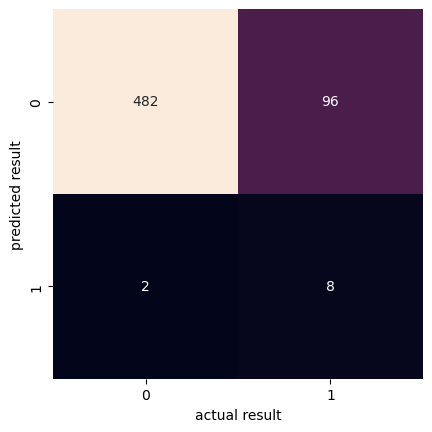

In [295]:
# Build a Confusion Matrix using test data
mat2 = confusion_matrix(prediction2, y_test)
sns.heatmap(mat2, square= True, fmt = 'g', annot=True, cbar = False)
plt.xlabel('actual result')
plt.ylabel('predicted result')
a,b = plt.ylim()
plt.show()

> **💡Solution💡-**
>
> a] **Accuracy Rate** 
>From the confusion matrix above, we can see that there were 14 times in which the model predicted that the employee would not stay and was the employee did not stay. In addition there were 482 times in which the model correctly predicted an employee would stay. We can take those 496 (482+8) times, and divide by the total size of the training set (588) to get the 84.35% oveall accuracy.

In [232]:
# Total number of observations
total_logmodel_matrix= sum(sum(mat2))
total_logmodel_matrix

# From confusion matrix calculate accuracy
# accuracy = (TP + TN)/ (TP+FP+FN+TN)

accuracy_logmodel = (mat2[1,1] + mat2[0,0])/total_logmodel_matrix
print('The logistic regression model has an accuracy of :', accuracy_logmodel)

The logistic regression model has an accuracy of : 0.8333333333333334


In [78]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       484
           1       0.88      0.13      0.23       104

    accuracy                           0.84       588
   macro avg       0.86      0.57      0.57       588
weighted avg       0.85      0.84      0.79       588



In [318]:
# Given values
TP = 482
TN = 8
FP = 96
FN = 2

# Specificity
specificity = TN / (TN + FP)
print('Specificity (True Negative Rate):', specificity)

# Precision
precision = TP / (TP + FP)
print('Precision:', precision)

# Sensitivity (Recall)
sensitivity = TP / (TP + FN)
print('Sensitivity:', sensitivity)

# Balanced Accuracy
balanced_accuracy = (sensitivity + specificity) / 2
print('Balanced Accuracy:', balanced_accuracy)


Specificity (True Negative Rate): 0.07692307692307693
Precision: 0.8339100346020761
Sensitivity: 0.9958677685950413
Balanced Accuracy: 0.5363954227590592


- **Accuracy (Overall Correctness):** The model achieves an accuracy of approximately 83.33%, indicating that it correctly predicts the outcome (attrition or non-attrition) for 83.33% of the instances in the test set.
- **Specificity (True Negative Rate):** The specificity is approximately 7.69%, which means that the model correctly identifies only about 7.69% of the non-attrition cases (true negatives) out of all actual non-attrition cases.
- **Precision (Positive Predictive Value):** The precision is approximately 83.39%, indicating that out of all instances predicted as positive (attrition cases), about 83.39% are actually true positive cases.
- **Sensitivity (True Positive Rate or Recall):** The sensitivity is approximately 99.59%, meaning that the model correctly identifies approximately 99.59% of the attrition cases (true positives) out of all actual attrition cases.
- **Balanced Accuracy:** The balanced accuracy is approximately 53.64%. This metric considers the average of sensitivity and specificity, giving a balanced view of the model's performance across both classes. In this case, it suggests that the model's performance is moderate, but it may be influenced by the class imbalance in the dataset.

Interpretation:

The model performs well in terms of overall accuracy, achieving an accuracy of 83.33%. However, it shows a significant imbalance in its ability to correctly identify non-attrition cases (low specificity) compared to attrition cases (high sensitivity). This could indicate that the model is better at predicting attrition cases than non-attrition cases. Additionally, the balanced accuracy, which considers both sensitivity and specificity, suggests that the model's performance is moderate, indicating room for improvement, possibly by addressing the class imbalance or considering alternative modeling techniques.

##### Solution - O

In [246]:
accuracy_score(y_train,  prediction1)

0.8560090702947846

In [247]:
accuracy_score(y_test, prediction2)

0.8333333333333334

> **💡Solution💡-**
>a] The purpose of comparing accuracy of a model on training set verses the test set is to evaluate how well the model generalizes to unseen data. The training accuracy indicates how well the model fits the training data, while the test accuracy indicates how well the model performs on new unseen data. By comparing these two values, we can asses whether the model is overfitting or not.
>
>b] The comparison suggests that the mmodel performs slightly better on the training set than on the test set. The training accuracy is 85.60%, while the test accuracy is 83.33%. Since the accuracy percentages are very simmilar, it appears that our model has not been overfit to the training set.

##### Solution - P

In [234]:
# New hypothetical employee
df3 = pd.DataFrame({
    'Age': [28],
    'DistanceFromHome': [5],
    'MonthlyIncome': [8000],
    'NumCompaniesWorked': [2],
    'EducationField_Life Sciences': [0],
    'EducationField_Marketing': [0],
    'EducationField_Medical': [1],
    'EducationField_Other': [0],
    'EducationField_Technical Degree': [0],
    'EnvironmentSatisfaction_2': [0],
    'EnvironmentSatisfaction_3': [0],
    'EnvironmentSatisfaction_4': [1],
    'JobSatisfaction_2': [0], 
    'JobSatisfaction_3': [1],
    'JobSatisfaction_4': [0],
    'WorkLifeBalance_2': [0],
    'WorkLifeBalance_3': [1],
    'WorkLifeBalance_4': [0],
    'MaritalStatus_Married': [0],
    'MaritalStatus_Single': [1] 
})

In [235]:
#Predict using the trained logistic regression model
predicted_leave = logmodel.predict(df3)
probability_leave = logmodel.predict_proba(df3)[:,1]

In [236]:
# Print the prediction and probability
if predicted_leave[0] == 0:
    print("Prediction: The employee will stay.")
else:
    print("Prediction: The employee will leave.")

print("Probability of leaving:", probability_leave[0])

Prediction: The employee will stay.
Probability of leaving: 0.160263201324315


##### Solution - Q

In [240]:
# Dataframe with numeric predictor variables Employee named - Sam
df4 = pd.DataFrame({
    'Age': [18],
    'DistanceFromHome': [14],
    'MonthlyIncome': [1999],
    'NumCompaniesWorked': [0],
    'EducationField_Life Sciences': [0],
    'EducationField_Marketing': [0],
    'EducationField_Medical': [0],
    'EducationField_Other': [0],
    'EducationField_Technical Degree': [1],
    'EnvironmentSatisfaction_2': [1],
    'EnvironmentSatisfaction_3': [0],
    'EnvironmentSatisfaction_4': [0],
    'JobSatisfaction_2': [1], 
    'JobSatisfaction_3': [0],
    'JobSatisfaction_4': [0],
    'WorkLifeBalance_2': [0],
    'WorkLifeBalance_3': [1],
    'WorkLifeBalance_4': [0],
    'MaritalStatus_Married': [0],
    'MaritalStatus_Single': [1] 
})

In [242]:
predicted_leave2 = logmodel.predict(df4)
probability_leave2 =  logmodel.predict_proba(df4)[:,1]

In [243]:
# Print the prediction and probability
if predicted_leave2[0] == 0:
    print("Prediction: The employee will stay.")
else:
    print("Prediction: The employee will leave.")

print("Probability of leaving:", probability_leave2[0])

Prediction: The employee will leave.
Probability of leaving: 0.509068395827781


> **💡Solution💡-**
>
>The result shows that the employee named Sam of the age of 18, who lives a bit far from the company (14) but has low income will leave with a probability of approximately 0.5090. This suggests that the model is highly uncertain about the outcome as the probability is close to 0.5, which indicates an equal chance of the employee staying or leaving. Therefore, the prediction is that the employee will leave, but moderate confidence.

### Part II: Random Forest Model

##### Solution - R

In [188]:
# Dataset back into Python
rfm = pd.read_csv("IBM.csv")

##### Solution - S

In [189]:
# Converting 'Attrition' into Binary format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
rfm["Attrition"] = label_encoder.fit_transform(rfm["Attrition"])
print(rfm["Attrition"]. value_counts())

Attrition
0    1233
1     237
Name: count, dtype: int64


In [190]:
#Dummification part 2

rfm1 = pd.get_dummies(rfm,
                    columns = ['Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance','Department', 'EducationField', 'MaritalStatus',])
rfm1 = rfm1.astype(int)

In [191]:
rfm1

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Education_1,Education_2,Education_3,Education_4,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,5993,8,6,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
1,49,0,8,5130,1,10,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,37,1,2,2090,6,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,33,0,3,2909,1,8,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,27,0,2,3468,9,2,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2571,4,5,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1466,39,0,6,9991,4,7,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1467,27,0,4,6142,1,6,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,5390,2,9,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


##### Solution - T

In [192]:
rfm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int32
 1   Attrition                          1470 non-null   int32
 2   DistanceFromHome                   1470 non-null   int32
 3   MonthlyIncome                      1470 non-null   int32
 4   NumCompaniesWorked                 1470 non-null   int32
 5   YearsAtCompany                     1470 non-null   int32
 6   Education_1                        1470 non-null   int32
 7   Education_2                        1470 non-null   int32
 8   Education_3                        1470 non-null   int32
 9   Education_4                        1470 non-null   int32
 10  Education_5                        1470 non-null   int32
 11  EnvironmentSatisfaction_1          1470 non-null   int32
 12  EnvironmentSatisfact

In [193]:
# Data Partioning Part II
from sklearn.model_selection import train_test_split

X = rfm1[['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked','YearsAtCompany','EducationField_Human Resources','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree','Education_1','Education_2','Education_3','Education_4','Education_5','EnvironmentSatisfaction_1','EnvironmentSatisfaction_2','EnvironmentSatisfaction_3','EnvironmentSatisfaction_4','JobSatisfaction_1','JobSatisfaction_2','JobSatisfaction_3','JobSatisfaction_4','WorkLifeBalance_1','WorkLifeBalance_2','WorkLifeBalance_3','WorkLifeBalance_4','Department_Human Resources','Department_Research & Development','Department_Sales','MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single']]
y = rfm1['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1131)

In [194]:
print(X_train.shape, X_test.shape, type(X_train), type(X_test))
print(y_train.shape, y_test.shape, type(y_train), type(y_test))

(882, 34) (588, 34) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(882,) (588,) <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [196]:
y_train.value_counts()

Attrition
0    749
1    133
Name: count, dtype: int64

In [197]:
y_train.value_counts(normalize = True)

Attrition
0    0.849206
1    0.150794
Name: proportion, dtype: float64

##### Solution - U

In [254]:
from sklearn.ensemble import RandomForestClassifier

In [309]:
clf = RandomForestClassifier()

In [281]:
param_grid = {
    'n_estimators': [50,100, 150],
    'max_depth': [2, 4, 6, 8],
    'max_features': [4, 8, 12, 16, 20],
    'min_samples_leaf': [2, 4, 6, 10],
}

In [282]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator = clf, param_grid= param_grid, cv=5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 8, 'max_features': 20, 'min_samples_leaf': 2, 'n_estimators': 50}


In [304]:
clf = RandomForestClassifier(n_estimators=50, max_depth=8, max_features =20, min_samples_leaf=2, random_state=1131)

In [310]:
clf.fit(X_train, y_train)

RandomForestClassifier()

##### Solution - V

In [311]:
predictions = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8333333333333334


In [313]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by = 'feature importance', ascending=False)
feature_imp_df

,feature importance,feature
2,0.144086,MonthlyIncome
0,0.111674,Age
1,0.100568,DistanceFromHome
4,0.098974,YearsAtCompany
3,0.068596,NumCompaniesWorked
16,0.031701,EnvironmentSatisfaction_1
33,0.026341,MaritalStatus_Single
13,0.022376,Education_3
14,0.021652,Education_4
20,0.020236,JobSatisfaction_1


MonthlyIncome is the most important feature. Feature importance are proportional and have no value outside the model. 

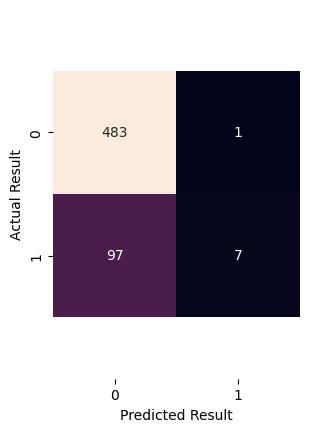

In [314]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim()
a += 0.5
b -= 0.5
plt.ylim(a, b)
plt.show()

##### Solution - W

In [312]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       484
           1       0.88      0.07      0.12       104

    accuracy                           0.83       588
   macro avg       0.85      0.53      0.52       588
weighted avg       0.84      0.83      0.77       588



In [315]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8333333333333334


In [319]:
# Given values
TP = 1
TN = 483
FP = 97
FN = 7

# Specificity
specificity = TN / (TN + FP)
print('Specificity (True Negative Rate):', specificity)

# Precision
precision = TP / (TP + FP)
print('Precision:', precision)

# Sensitivity (Recall)
sensitivity = TP / (TP + FN)
print('Sensitivity:', sensitivity)

# Balanced Accuracy
balanced_accuracy = (sensitivity + specificity) / 2
print('Balanced Accuracy:', balanced_accuracy)


Specificity (True Negative Rate): 0.8327586206896552
Precision: 0.01020408163265306
Sensitivity: 0.125
Balanced Accuracy: 0.4788793103448276


Interpretations of the confussion metrics:

1. **Accuracy (Overall Correct Predictions):** The model achieves an accuracy of approximately 83.33%. This indicates that around 83.33% of the predictions made by the model are correct.
2. **Specificity (True Negative Rate):** The specificity, or true negative rate, is approximately 83.28%. This means that the model correctly identifies around 83.28% of the employees who do not churn (negative class) out of all actual non-churn cases.
3. **Precision (Positive Predictive Value):** The precision of the model is approximately 1.02%. This means that out of all the predicted positive cases (employees who churn), only about 1.02% are actually true positives.
4. **Sensitivity (True Positive Rate or Recall):** The sensitivity, or true positive rate, is approximately 12.5%. This indicates that the model correctly identifies around 12.5% of the employees who churn out of all actual churn cases.
5. **Balanced Accuracy:** The balanced accuracy is approximately 47.89%. This metric takes into account both sensitivity and specificity and provides a balanced measure of the model's performance across both classes.

Interpretation:
The model achieves a relatively high accuracy, which indicates that it performs well in overall prediction. However, the precision and sensitivity are quite low, suggesting that the model struggles to correctly identify employees who actually churn (positive class). This imbalance in performance between the two classes might indicate a need for further tuning or exploration of the model to improve its predictive power, especially in correctly identifying churn cases.

##### Solution - X

In [321]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions)
print('Accuracy on Training Set:', train_accuracy)
print('Accuracy on Test Set:', test_accuracy)

Accuracy on Training Set: 0.9988662131519275
Accuracy on Test Set: 0.8333333333333334


> **💡Solution💡-**
>
>The accuracy on the training set (99.89%) is significantly higher than the accuracy on the test set (83.33%) indicates that the model is performing much better on the training data compared to the unseen test data. There is a possibility of model being overfitted.

##### Solution - Y

In [323]:
# New hypothetical employee
Sam2 = pd.DataFrame({
    'Age': [28],
    'DistanceFromHome': [5],
    'MonthlyIncome': [8000],
    'NumCompaniesWorked': [2],
    'YearsAtCompany': [3],
    'Education_1': [0],
    'Education_2': [0],
    'Education_3': [0],
    'Education_4': [1],
    'Education_5': [0],
    'EnvironmentSatisfaction_1': [0],
    'EnvironmentSatisfaction_2': [0],
    'EnvironmentSatisfaction_3': [0],
    'EnvironmentSatisfaction_4': [1],
    'JobSatisfaction_1': [0],
    'JobSatisfaction_2': [0],
    'JobSatisfaction_3': [1],
    'JobSatisfaction_4': [0],
    'WorkLifeBalance_1': [0],
    'WorkLifeBalance_2': [0],
    'WorkLifeBalance_3': [1],
    'WorkLifeBalance_4': [0],
    'Department_Human Resources': [0],
    'Department_Research & Development': [1],
    'Department_Sales': [0],
    'EducationField_Human Resources': [0],
    'EducationField_Life Sciences': [0],
    'EducationField_Marketing': [0],
    'EducationField_Medical': [1],
    'EducationField_Other': [0],
    'EducationField_Technical Degree': [0],
    'MaritalStatus_Divorced': [0],
    'MaritalStatus_Married': [0],
    'MaritalStatus_Single': [1],
})

In [326]:
# Get the feature names used during training
feature_names = X_train.columns

# Reorder the columns of Sam2 to match the order of feature_names
Sam2 = Sam2[feature_names]

# Now try making predictions
prediction_Sam2 = clf.predict(Sam2)

In [327]:
prediction_Sam2 = clf.predict(Sam2)

In [329]:
# Print the prediction
if prediction_Sam2[0] == 0:
    print("The model predicts that the invented person will stay.")
else:
    print("The model predicts that the invented person will leave.")

The model predicts that the invented person will stay.


##### Solution - Y

> **💡Solution💡-** 
>
> Foget playing whack-a-mole with the employee departures! The Human Resources Department now has a secret weapon: Logistic regression and random forest models. By leveraging these models, the HR professionals can proactively identify employees at risk of leaving the organization, allowing them to implement targeted retention strategies. Imagine if the employee that I invented "Sam" if he is showing the signs of packing his bags, and the model flags him, this would prompt the HR to chat with Sam and discover what could be the reason... if he craves a challenge. A new project will regnites her passion! Voila!
>
>Additionally, these models enable HR to quantify the likelihood of attrition, providing valuable metrics for workforce planning and budgeting purposes. These tools empower HR to move from firefighting to a proactive employee retainers, building a loyal and highly competitive team.

### Part III: Using Tableau to Build a Dashboard

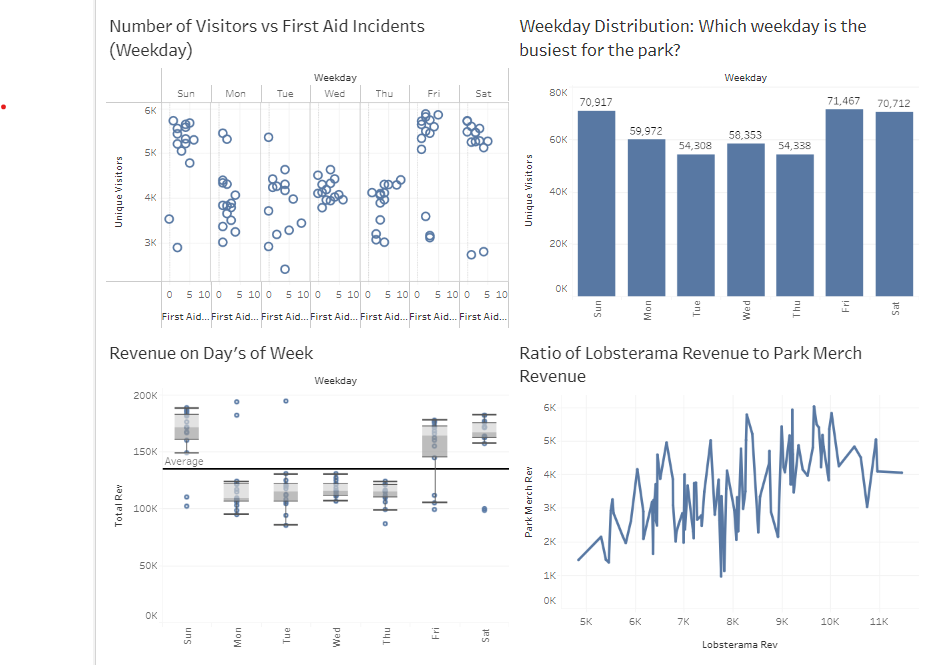

https://prod-useast-b.online.tableau.com/t/aish7bc96f9306e/authoring/AD654Assignment-4/Sheet1/AD%20654%20Assignment%20-%204#1

> **💡Tableau Dashboard💡-**
>
> **Revenue on Day's of Week**
>
> The plot shows the distribution of revenue across the days of the week. It is a useful way to see how the revenue varies between days, and to identify any outliers. The plot shows highest revenue on Saturday around `$180000`. The median revenue is around `$100,000`. Least revnue is on Thursdays and Mondays
>
> **Number of Visitors vs First Aid Incidents (Weekday)**
>
> The graph shows the number of visitors and first aid incidents on a weekly basis. The number of visitors is consistently higher than the number of first aid incidents. There is a trend of more visitors on weekdays than weekends. Most visitors were on Fridays (around 6000) and least on Thursdays (around 4000). Most first aid incidents seems to be on Thursdays too.
>
>**Weekday Distribution: Which weekday is the busiest for the park?**
>
>Sunday is the busiest and Thursday is the least visited day of the week.
>
>**Ratio of Lobsterama Revenue of Park Merch Revenue**
>
>The graph shows the ratio of Lobsterama Revenue to Park Merch Revenue. When lobsterama was 6647 Park Merch was 4951